function 'put_together_cardiograms' in progress:
preparing for 009cecedecb76a6ee2aec4e0b15445c2 in progress...
preparing for 065080e859f502797866dabaa7c22205 in progress...


c:\users\oleks\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning:

Data with input dtype int32 was converted to float64 by the normalize function.



function 'render' in progress 



<IPython.core.display.Javascript object>


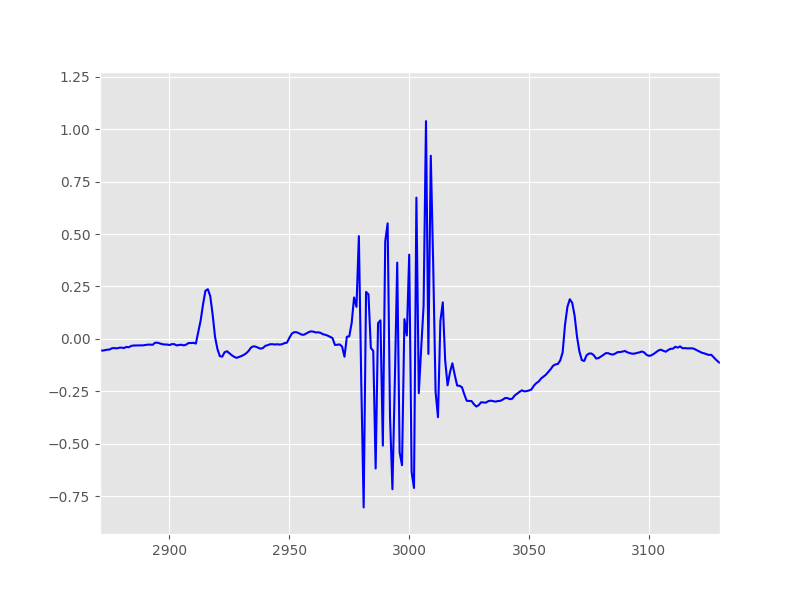

In [31]:
import os
import threading
import logging
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from sklearn.preprocessing import normalize

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (8, 6)  # Размер картинок

#logging.getLogger("tensorflow").setLevel(logging.WARNING) 


#визуализация массива или несколько массивов
def render(*array:"lists of array", frequency:'Hz'= 1, colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']):
    print("function 'render' in progress \n")
    #возвращает цвета из массива colors, когда кончатся стандартные цвета, будет генерировать случайные
    def get_color():
        for color in colors:
            yield color
    #экземпляр класса get_color
    color_buffer = get_color()

    for n, y in enumerate(array):
        #использует базовые цвета в наличии(colors), если заканчиваются, генерирует случайные
        if n < len(colors):
            color = next(color_buffer)        
        else:
            color = (np.random.randint(255, size=(1, 3))/255).flat

        x  = np.linspace(0, frequency*len(y), len(y), endpoint=False)
        plt.plot(x, y, color=color, marker ='')

    plt.show()


#соединяет все кардиограммы из папки в один массив
def merge_cardiograms(path:"string" = r"binary", amount:"int" = 0)->"":
    from sklearn.preprocessing import normalize
    print("function 'put_together_cardiograms' in progress:")
    
    #создать список полных путей к каждой кардиограмме в папке
    names = os.listdir(path)
    files = [os.path.join(path, name) for name in names][:amount]
    
    cardiograms = np.zeros(0)
   
    def preparing(file:"list", name:"string"):
        print("preparing for {} in progress...".format(name))
        #считать с файла в numpy массив
        array = np.fromfile(file, dtype='i4', count=-1, sep='')
        #подменить "Nan" ноль
        array[np.isnan(array)] = 0   
        
        #округляем целые числа до 5 знаков
        array = np.round(array, decimals=-5)
        #создаем словарь в котором на каждый тип количество повторений одинаковых значений
        #там где много это шум
        noise_counter = Counter(array)
        
        #удаляем значения шум, если шум повторяется больше чем 50 раз - удаляем
        noises  = []
        for value, key in zip(noise_counter.values(), noise_counter.keys()):
            if value > 50:
                noises.append(key)
                
        for noise in noises:
            array = array[array!= noise]
            
        #нормализовать значения в пределах [-1,1] norm='l2'
        normalized = normalize(np.array([array]), norm='max').reshape(-1)

        return normalized
    
    for file, name in zip(files,names):
        cardiograms = np.concatenate((cardiograms, preparing(file, name)), axis=0)

    return -cardiograms


#найти пики с условием поиска от начала пиков, возвращает пики, разметку values_x, values_y
def get_peaks(cardiogram:"list"= [], step:"int"= 185) -> "вернет пики с позициями(идексами)":
    print("function 'get_peaks' in progress")
  
    return x_peak


y = merge_cardiograms(amount = 2)

# get_peaks(cardiogram)





render(y[0:5400])